In [1]:
import math
import cairo
import PIL
from PIL import Image, ImageOps

In [4]:
cairo.HAS_SVG_SURFACE, cairo.HAS_PNG_FUNCTIONS

(1, 1)

In [9]:
def generate(prod, rules, n):
    if n == 0:
        return prod
    return generate(''.join(map(lambda x: rules[x], prod)), rules, n - 1)

In [3]:
def add_identity_rules(rules):
    keys = set(rules.keys())
    values = set([ch for v in rules.values() for ch in v])
    nonkeys = values.difference(keys)
    return {**rules, **{k: k for k in nonkeys}}

In [169]:
class LSystemCanvas(object):
    
    def __init__(self, width, height, step, line_width=0.001, line_color=(0, 0, 0)):
        # add line_color validation?
        self.step = step
        self.line_width = line_width
        self.line_color = line_color
        self.surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
        self.ctx = cairo.Context(self.surface)
        self.ctx.scale(width, height)
        self.ctx.translate(line_width, 1)
        self.ctx.rotate(math.radians(180))
        
    def draw_line(self):
        self.ctx.line_to(0, self.step)
        self.ctx.translate(0, self.step)        
    
    def rotate(self, degrees):
        self.ctx.rotate(math.radians(degrees))
        
    def save_png(self, filename):
        self.ctx.set_source_rgb(*self.line_color)
        self.ctx.set_line_width(self.line_width)
        self.ctx.stroke()
        self.surface.write_to_png(f'{filename.replace(".png", "")}.png')

In [5]:
class QuadGosper(object):
    axiom = '-B'
    rules = add_identity_rules({
        'A': 'AA-B-B+A+A-B-BA+B+AAB-A+B+AA+B-AB-B-A+A+BB-',
        'B': '+AA-B-B+A+AB+A-BB-A-B+ABB-A-BA+A+B-B-A+A+BB'       
    })

    @classmethod
    def draw(cls, canvas, n=2):
        for item in generate(cls.axiom, cls.rules, n):
            if item in ['A', 'B']:
                canvas.draw_line()
            elif item == '-':
                canvas.rotate(90)
            elif item == '+':
                canvas.rotate(-90)

In [162]:
canvas = LSystemCanvas(2000, 2000, 0.01)
QuadGosper.draw(canvas, 4)
canvas.save_png('quad_gosper')

In [6]:
class Hilbert(object):
    axiom = 'A'
    rules = add_identity_rules({
        'A': '-BF+AFA+FB-',
        'B': '+AF-BFB-FA+'
    })
    
    @classmethod
    def draw(cls, canvas, n=2):
        for item in generate(cls.axiom, cls.rules, n):
            if item == 'F':
                canvas.draw_line()
            elif item == '-':
                canvas.rotate(90)
            elif item == '+':
                canvas.rotate(-90)

In [149]:
canvas = LSystemCanvas(2000, 2000, 0.005)
Hilbert.draw(canvas, 8)
canvas.save_png('hilbert')

In [7]:
class Moore(object):
    axiom = 'LFL+F+LFL'
    rules = add_identity_rules({
        'L': '-RF+LFL+FR-',
        'R': '+LF-RFR-FL+'
    })
    
    @classmethod
    def draw(cls, canvas, n=2):
        for item in generate(cls.axiom, cls.rules, n):
            if item == 'F':
                canvas.draw_line()
            elif item == '-':
                canvas.rotate(-90)
            elif item == '+':
                canvas.rotate(90)

In [207]:
canvas = LSystemCanvas(2000, 2000, 0.005)
Moore.draw(canvas, 8)
canvas.save_png('moore')

In [170]:
canvas = LSystemCanvas(200, 200, 0.2, 0.1)
Hilbert.draw(canvas, 3)
canvas.save_png('hilbert_200')

In [171]:
canvas = LSystemCanvas(200, 200, 0.2, 0.1)
QuadGosper.draw(canvas, 2)
canvas.save_png('quadgosper_200')

In [172]:
h = Image.open('hilbert_200.png')
qg = Image.open('quadgosper_200.png')
b1 = Image.blend(h, qg, 0.5)

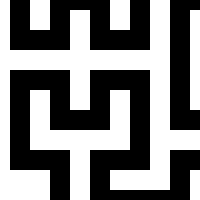

In [173]:
h

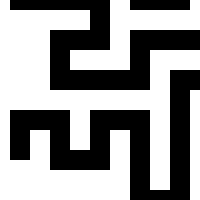

In [175]:
qg

In [134]:
b1.getcolors()

[(12900, (0, 0, 0, 0)), (15600, (0, 0, 0, 127)), (11500, (0, 0, 0, 255))]

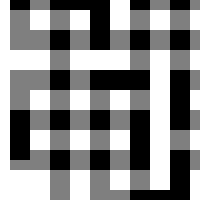

In [176]:
b1

In [203]:
new_im = Image.new('1', (200, 200))

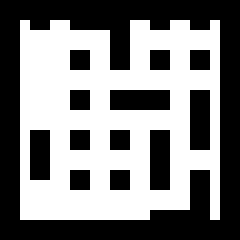

In [204]:
# black if black else white
data = [0 if v == (0, 0, 0, 255) else 1 for v in b1.getdata()]
new_im.putdata(data)
ImageOps.expand(new_im, border=20, fill=0)

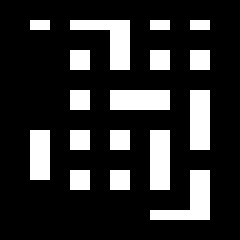

In [205]:
# white if black else black
data = [1 if v == (0, 0, 0, 255) else 0 for v in b1.getdata()]
new_im.putdata(data)
ImageOps.expand(new_im, border=20, fill=0)

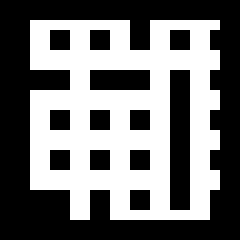

In [206]:
# black if white else white
data = [0 if v == (0, 0, 0, 0) else 1 for v in b1.getdata()]
new_im.putdata(data)
ImageOps.expand(new_im, border=20, fill=0)